Epoch 0: Loss = 2.0860434270905497
Epoch 1000: Loss = 0.010632795534253248
Epoch 2000: Loss = 0.006540395379827544
Epoch 3000: Loss = 0.004934709980115776
Epoch 4000: Loss = 0.00403960493390304
Epoch 5000: Loss = 0.003456347596330537
Epoch 6000: Loss = 0.003040801957462026
Epoch 7000: Loss = 0.002727058178921241
Epoch 8000: Loss = 0.002480310596216876
Epoch 9000: Loss = 0.0022802840063204373


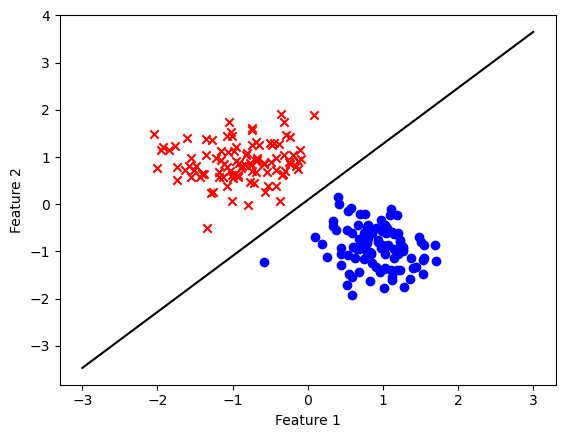

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generate data
mean1 = [2, 2]
cov = [[1, 0], [0, 1]]
mean2 = [-2, 6]

data1 = np.random.multivariate_normal(mean1, cov, 100)
data2 = np.random.multivariate_normal(mean2, cov, 100)

# Combine the data and labels
data = np.concatenate((data1, data2))
labels = np.concatenate((np.zeros(100), np.ones(100)))

# Standardize the data
data = (data - np.mean(data, axis=0)) / np.std(data, axis=0)

# Add a column of ones to the data for the bias term
data = np.hstack((np.ones((data.shape[0], 1)), data))

# Initialize weights
np.random.seed(2)
weights = np.random.randn(data.shape[1])

# Set hyperparameters
learning_rate = 0.001
epochs = 10000

# Training loop
for epoch in range(epochs):
    # Compute the logits
    logits = np.dot(data, weights)
    
    # Apply the sigmoid activation function
    predicted_labels = 1 / (1 + np.exp(-logits))
    
    # Compute the gradient of the loss function
    gradient = np.dot(data.T, predicted_labels - labels)
    
    # Update the weights
    weights -= learning_rate * gradient
    
    # Compute the binary cross-entropy loss
    loss = -(labels * np.log(predicted_labels) + (1 - labels) * np.log(1 - predicted_labels)).mean()
    
    # Print the current loss
    if epoch % 1000 == 0:
        print(f"Epoch {epoch}: Loss = {loss}")

# Plot the data points
plt.scatter(data[:100, 1], data[:100, 2], color='blue', marker='o')
plt.scatter(data[100:, 1], data[100:, 2], color='red', marker='x')

# Plot the decision boundary
x1 = np.linspace(-3, 3, 100)
x2 = -(weights[0] + weights[1] * x1) / weights[2]
plt.plot(x1, x2, color='black')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()
